In [ ]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline

In [ ]:

#pd.options.plotting.backend='hvplot'#to hvplot


In [ ]:
#importing datset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
telco = pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn-prediction.csv')
telco.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

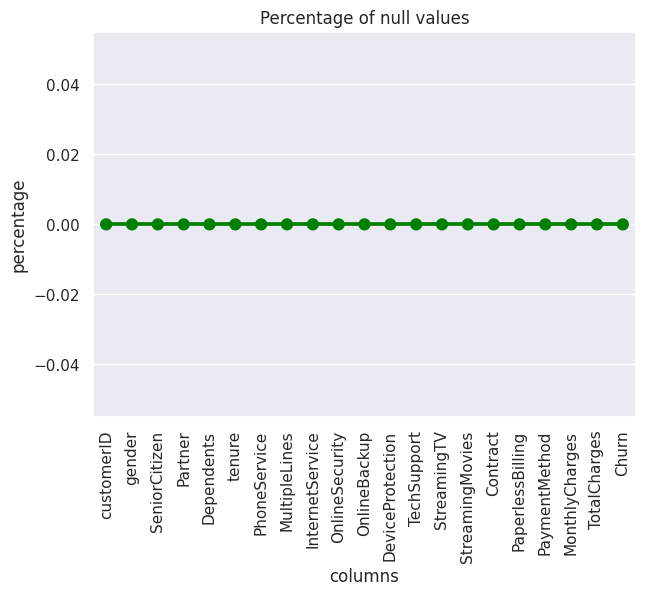

In [ ]:
#ploting the null percentage
null=pd.DataFrame((telco.isnull().sum())*100/telco.shape[0]).reset_index()#shape[0] is no.of rows
plt.figure(figsize=(7,5))
sns.set_theme(style="darkgrid")
ax=sns.pointplot(x='index',y=0,data=null,color='green')#pointplot estimate the central tendency of variables
plt.title('Percentage of null values')
plt.xticks(rotation=90)
plt.xlabel('columns')
plt.ylabel('percentage')
plt.show()

Percentage of null values is zero

In [ ]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
telco.shape

(7043, 21)

In [ ]:
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Maximum tenure period customer have is 72 months. seniorcitizen didn't have proper distribution beacause it is actually categorical. Average monthly charges customer spend is 64 dolloars

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Text(0.5, 1.0, 'count of per target variable')

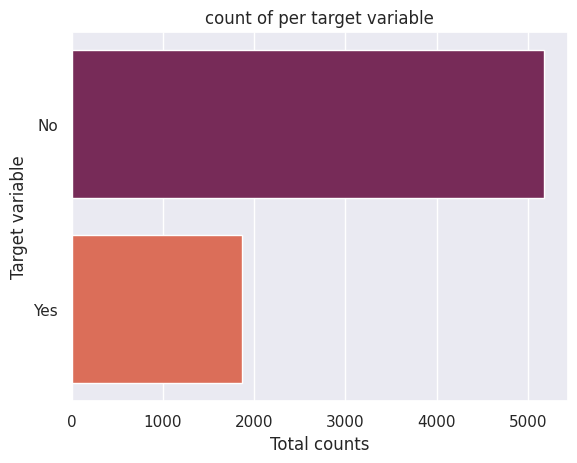

In [ ]:
#checking the value count of target variable
sns.countplot(y='Churn',data=telco,palette='rocket')
#telco['Churn'].value_counts().plot(kind='barh',figsize=(10,10),color='g')
plt.xlabel('Total counts')
plt.ylabel('Target variable')
plt.title('count of per target variable')

In [ ]:
telco['Churn'].value_counts()*100/len(telco['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Data is highly imbalance(No-73% & Yes-27%).So we have to do imbalanced learning to make evevn ratio to avoid bias.

#Data cleaning

converting datatype

In [ ]:
#creating copy of base data
telco_data = telco.copy()
telco_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco_data['TotalCharges']=pd.to_numeric(telco_data['TotalCharges'],errors='coerce')#change datatype


In [ ]:
telco_data['TotalCharges'].dtypes

dtype('float64')

In [ ]:
telco_data['TotalCharges'].isnull().sum()

11

Totalcharges shows no null when object datatype because of nan. when converted to num it shows null.

In [ ]:
#filling null values
telco_data['TotalCharges']=telco_data['TotalCharges'].fillna(telco_data['TotalCharges'].mean())
telco_data['TotalCharges'].isnull().sum()

0

In [ ]:
telco_data['tenure'].max() #maximum tenure period

72

Maximum tenure period is 72

In [ ]:
#creating new feature
labels=["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
telco_data['Tenure_period']=pd.cut(telco_data.tenure,range(1,79,12),right=False,labels=labels)

In [ ]:
telco_data['Tenure_period'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: Tenure_period, dtype: int64

2175 customers are between 1-12 tenure period.

In [ ]:
#deleting unwanted columns
telco_data.drop(columns=['customerID'],axis=1,inplace=True)
telco_data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_period
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12


In [ ]:
#detecting outlier
telco_data['TotalCharges'].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [ ]:
telco_data['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

No outlier detected.

#EDA

<ipython-input-25-f6b45e90c7b7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(telco_data.corr(),annot=True,cbar=True,linewidths=0.8,cmap='BuPu')


<Axes: >

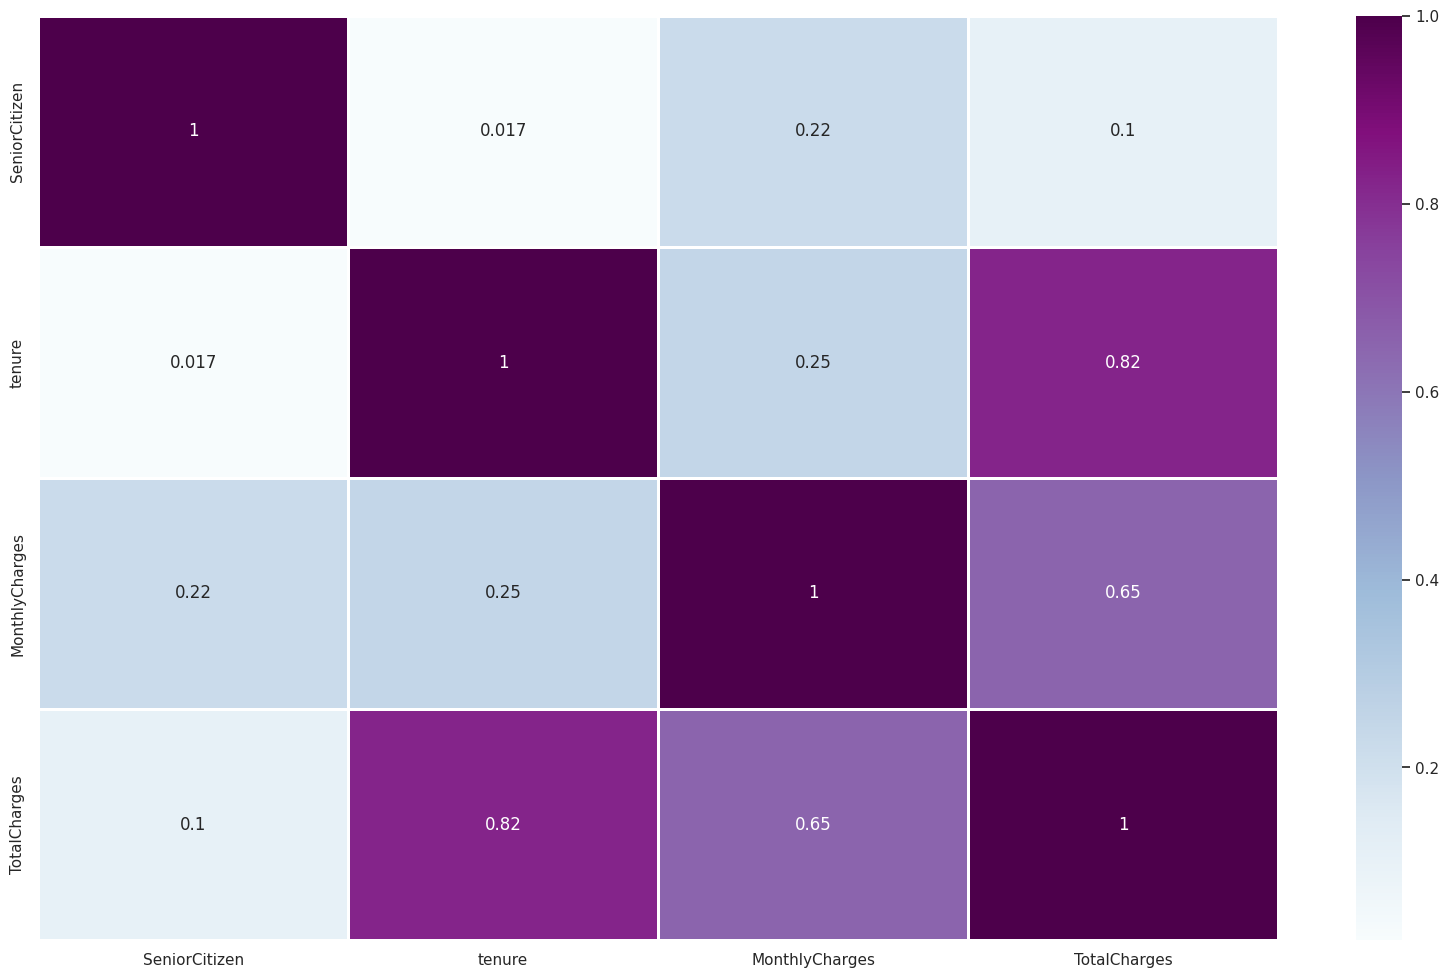

In [ ]:
#Heatmap
plt.figure(figsize=(20,12))
sns.heatmap(telco_data.corr(),annot=True,cbar=True,linewidths=0.8,cmap='BuPu')




*   column that closer to value 1 has strong linear relationship.
*   co - relation only measure linear relationship in data.
*   It doesn't measure non-linear relationship.
*   so we don't delete features based on co-reltion for other than linear relationships.

Distribution of features Continuous





In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
continuous=telco_data.dtypes[telco_data.dtypes!='O'].index
continuous

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Tenure_period'],
      dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

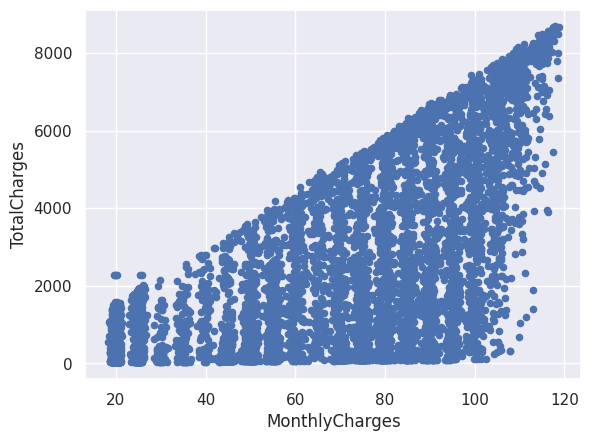

In [ ]:
telco_data.plot(kind='scatter',x="MonthlyCharges",y="TotalCharges")

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

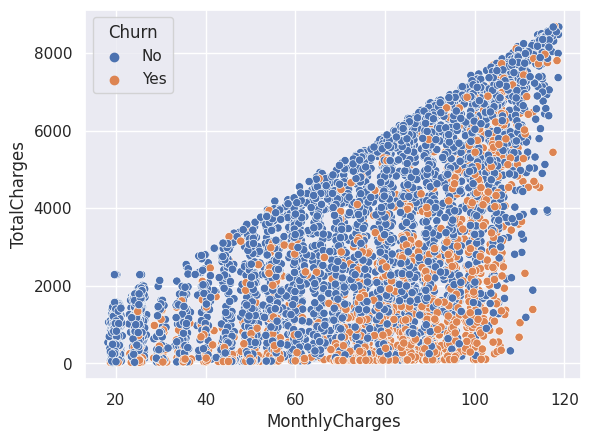

In [ ]:
sns.scatterplot(x="MonthlyCharges",y="TotalCharges",data=telco_data,hue="Churn")



*   If monthly charge increases churning rate also increases.Most of the
    churning customers lies between 0-2000 Totalcharges.
*   If total charges increas monthly charge also increases. Co-relation occurs.
*   Co-relation occurs between monthlycharge and total charge.





Text(0.5, 1.0, 'Totalcharges by churn')

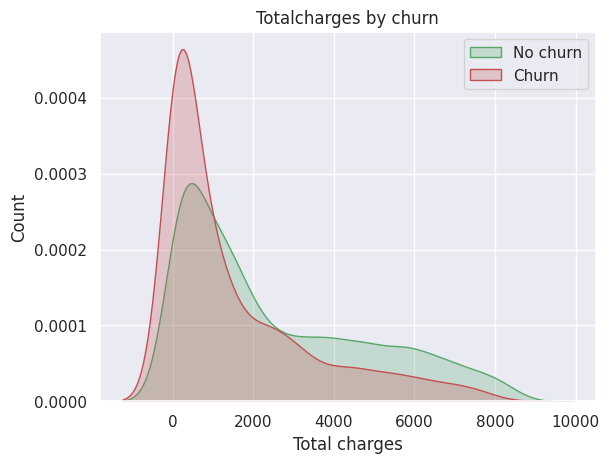

In [ ]:
Total = sns.kdeplot(telco_data.TotalCharges[(telco_data['Churn']=='No')],color='g',shade=True)
sns.kdeplot(telco_data.TotalCharges[(telco_data['Churn']=='Yes')],ax=Total,color='r',shade=True)
plt.legend(["No churn","Churn"],loc="upper right")
plt.ylabel('Count')
plt.xlabel('Total charges')
plt.title('Totalcharges by churn')


When total charge is low churning rate is high.Here, we see if customer pay high amount of monthly charge in low tenure is leeds to lower total charges.

<Axes: xlabel='SeniorCitizen'>

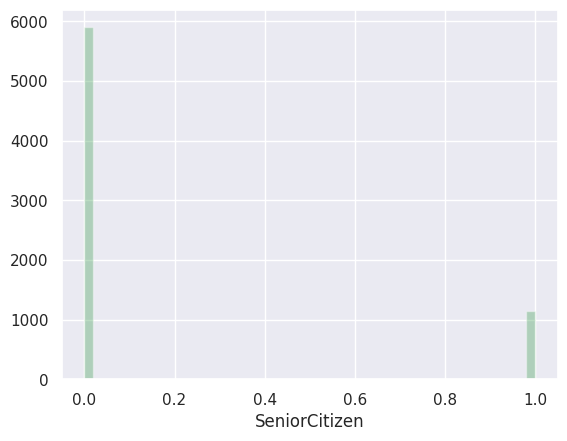

In [ ]:
sns.distplot(telco_data.SeniorCitizen, color='g',kde=False)

Majority of senior citizen is 0(No)

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

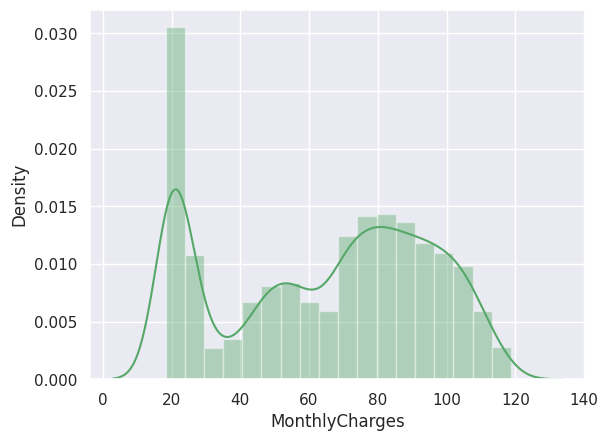

In [ ]:
sns.distplot(telco_data.MonthlyCharges,color='g')

Not follow uniform distribution.

<Axes: xlabel='TotalCharges', ylabel='Density'>

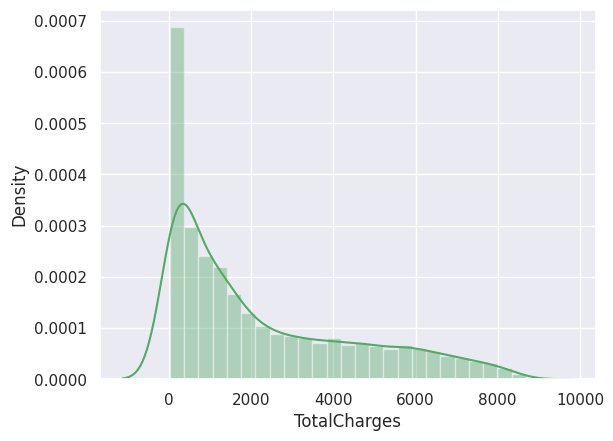

In [ ]:
sns.distplot(telco_data.TotalCharges,color='g')

Skew in data.Not follow uniform distribution.

#Distribution of features CATEGORICAL

In [ ]:
cat=[ x for x in telco_data.columns if telco_data[x].dtypes=='O']
cat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
telco_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Tenure_period'],
      dtype='object')

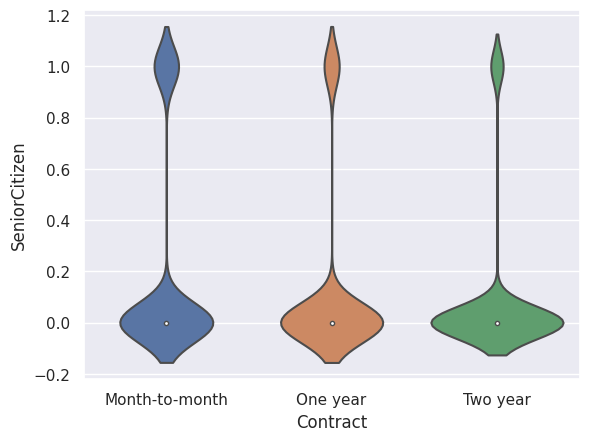

In [ ]:
ax = sns.violinplot(x='Contract',y='SeniorCitizen',data=telco_data)

Most of the contract customer are Non-seniorcitizen.

<Axes: xlabel='SeniorCitizen', ylabel='count'>

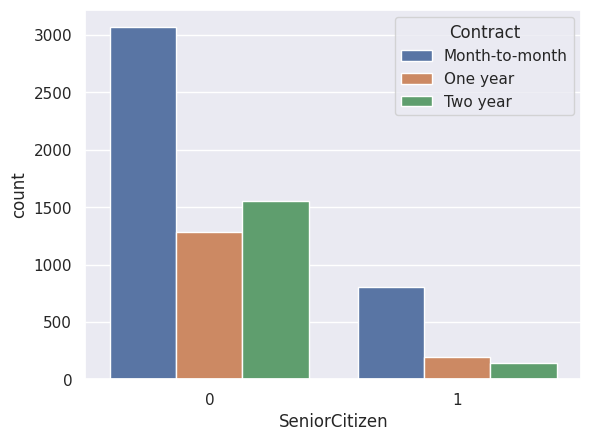

In [ ]:
sns.countplot(x='SeniorCitizen',data=telco_data,hue='Contract')

Clearly shows mostof the non-senior citizens are monthly contractors and they have more likely to churn because they are free to go.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

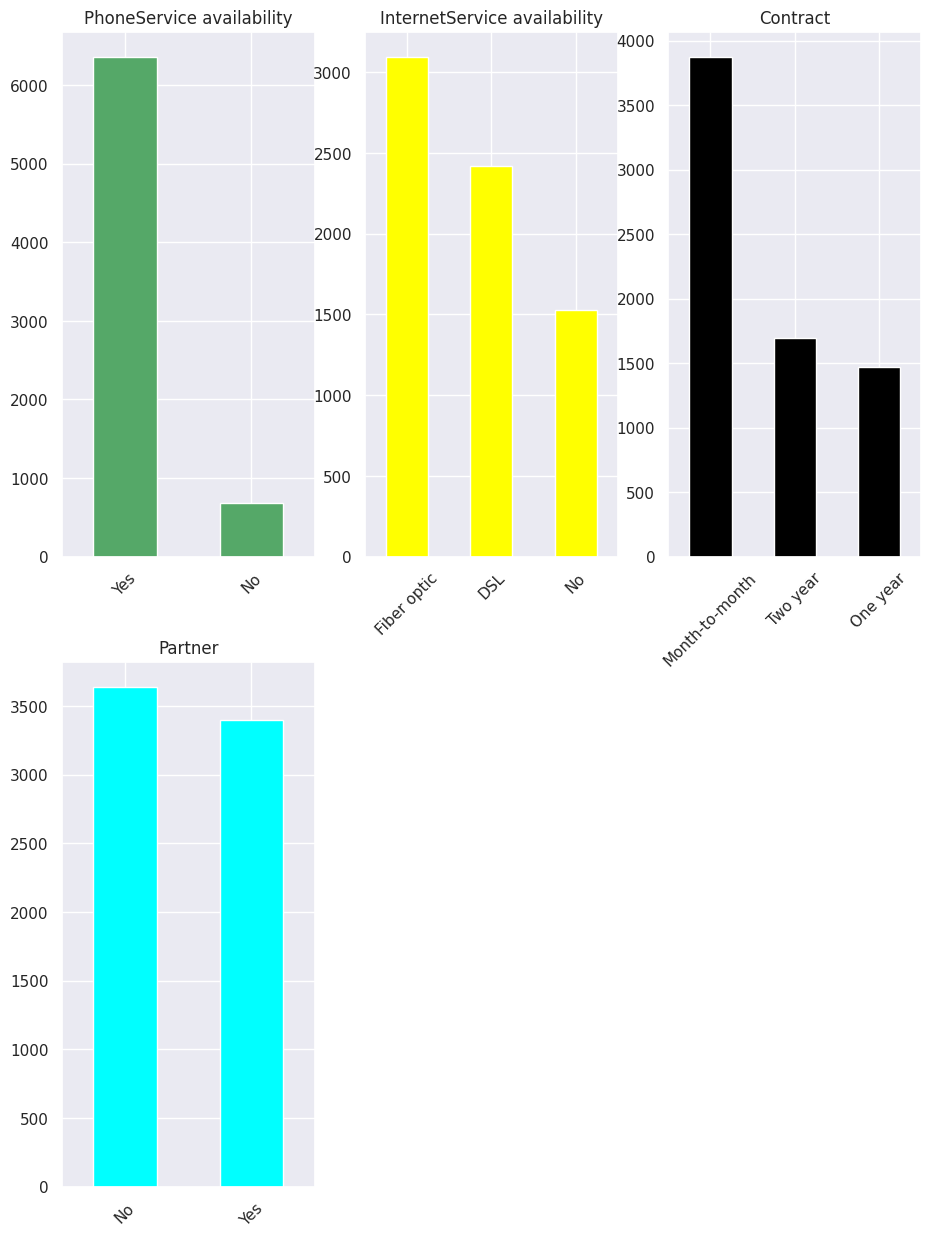

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(241)
plt.title("PhoneService availability")
telco_data.PhoneService.value_counts().plot(kind='bar',color='g')
plt.xticks(rotation=45)

plt.subplot(242)
plt.title("InternetService availability")
telco_data.InternetService.value_counts().plot(kind='bar',color='yellow')
plt.xticks(rotation=45)

plt.subplot(243)
plt.title("Contract")
telco_data.Contract.value_counts().plot(kind='bar',color='black')
plt.xticks(rotation=45)

plt.xticks(rotation=45)
plt.savefig('hospital.png')

plt.subplot(245)
plt.title('Partner')
telco_data.Partner.value_counts().plot(kind='bar',color='cyan')
plt.xticks(rotation=45)



*   Most of the customers have phone service.
*   customers prefer month-to-month contract than year contract.
*   Most people prefer fibre optic internet service.
*   Male customers are higher than female customers.



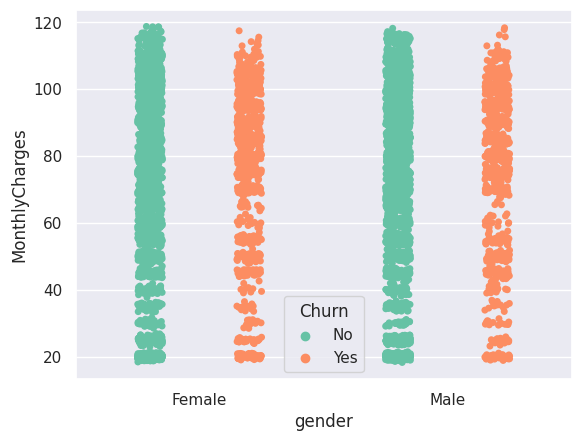

In [ ]:
ax = sns.stripplot(x = 'gender',y='MonthlyCharges',hue='Churn',data=telco_data,palette="Set2",dodge=True)




*   Females are highly monthly charge customers.



#Feature Vs Target

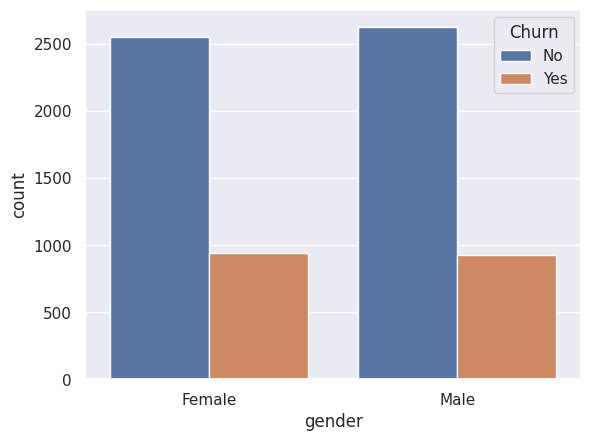

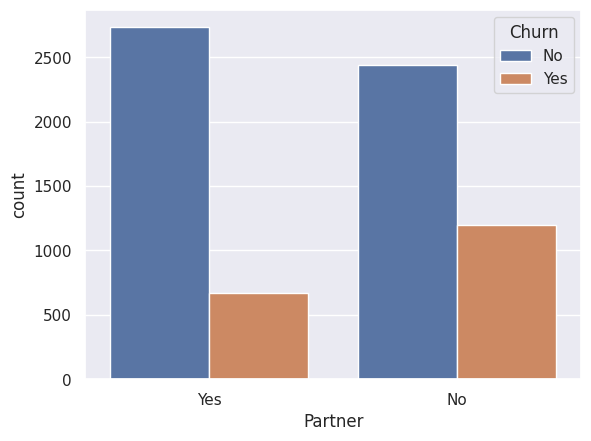

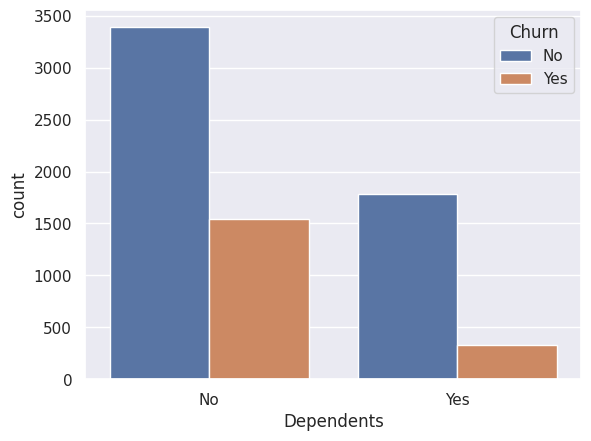

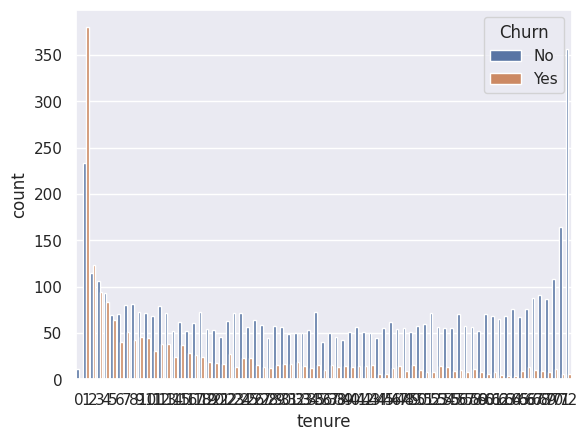

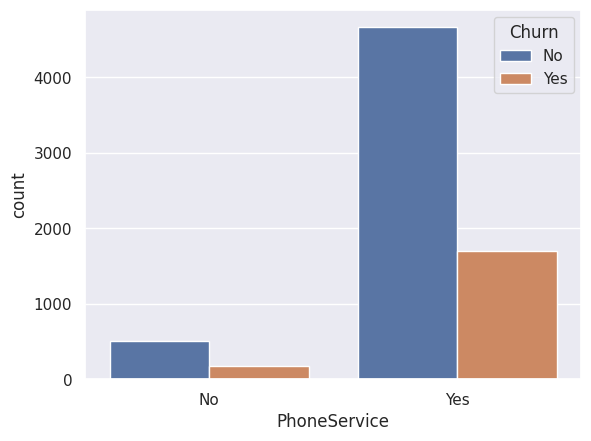

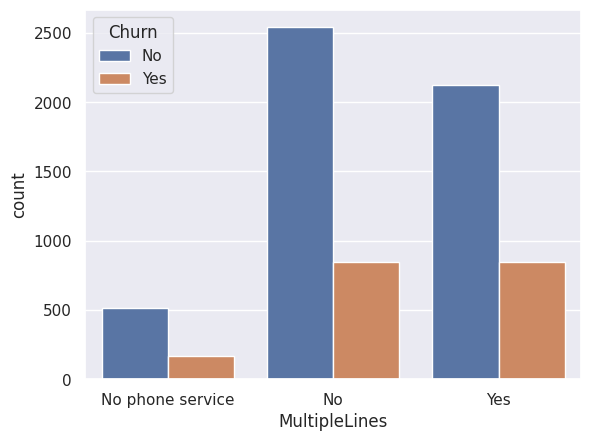

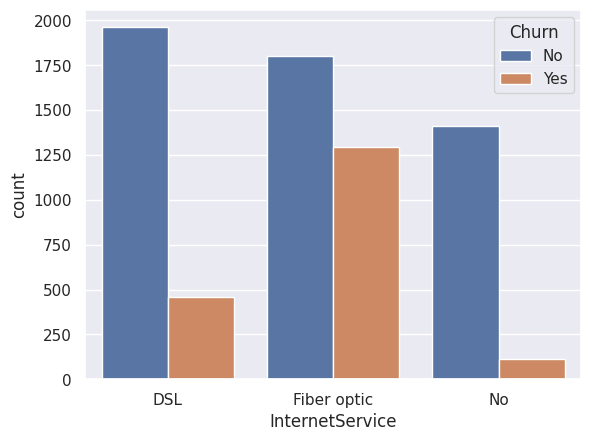

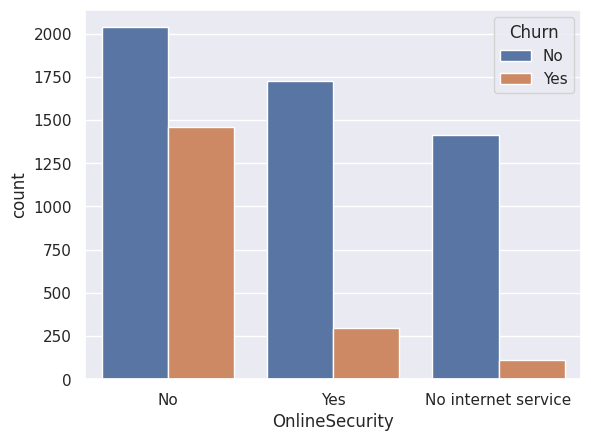

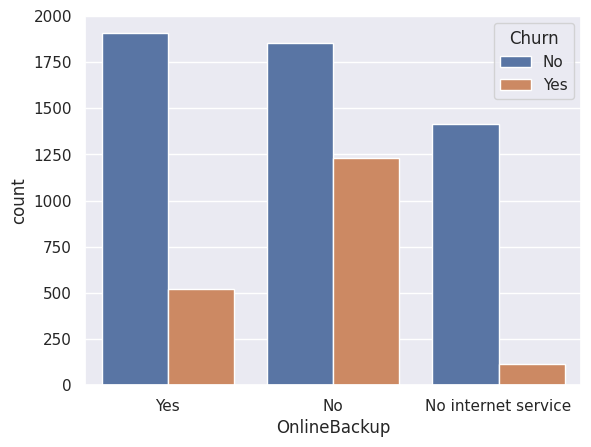

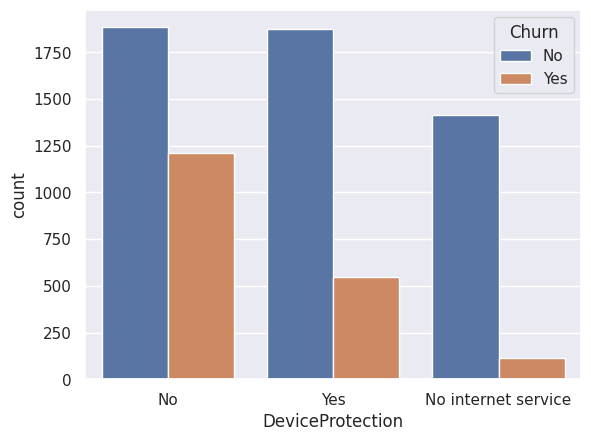

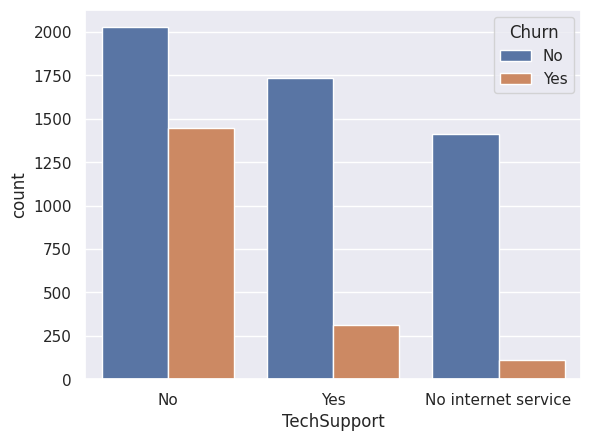

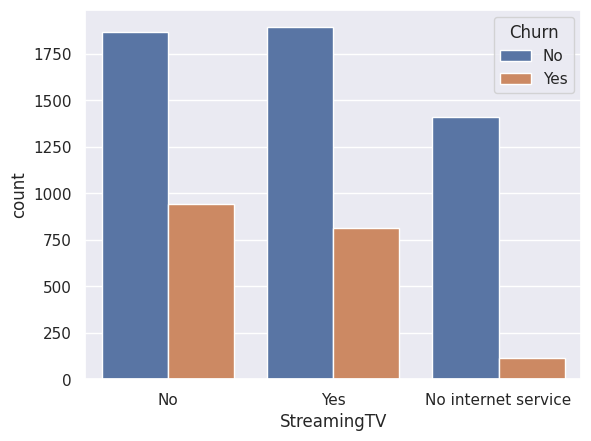

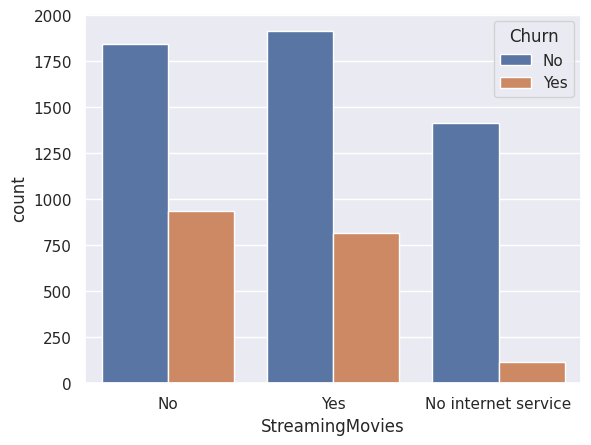

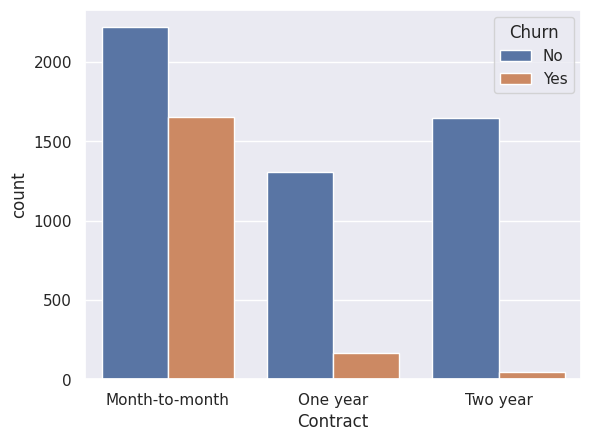

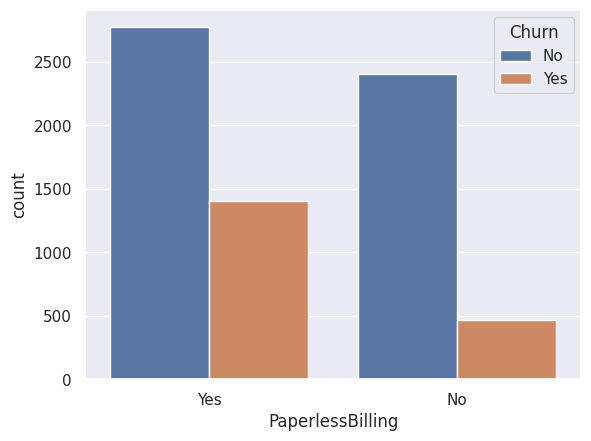

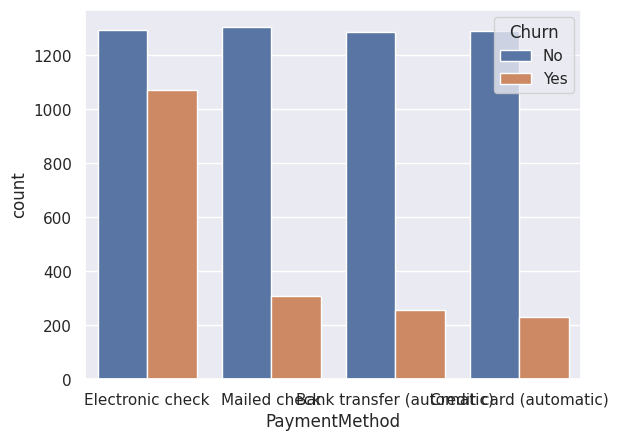

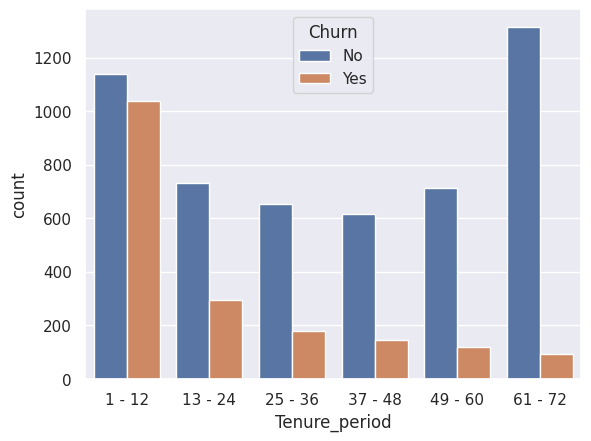

In [ ]:
for i ,cat in enumerate(telco_data.drop(columns=["Churn","MonthlyCharges","SeniorCitizen","TotalCharges"])):
  plt.figure(i)
  sns.countplot(data=telco_data,x=cat,hue='Churn')


Distribution of churn with categorical features.

In [ ]:
telco_data['Churn']=telco_data['Churn'].map({'Yes':1,'No':0})

Text(0.5, 1.0, 'TechSupport Vs churn')

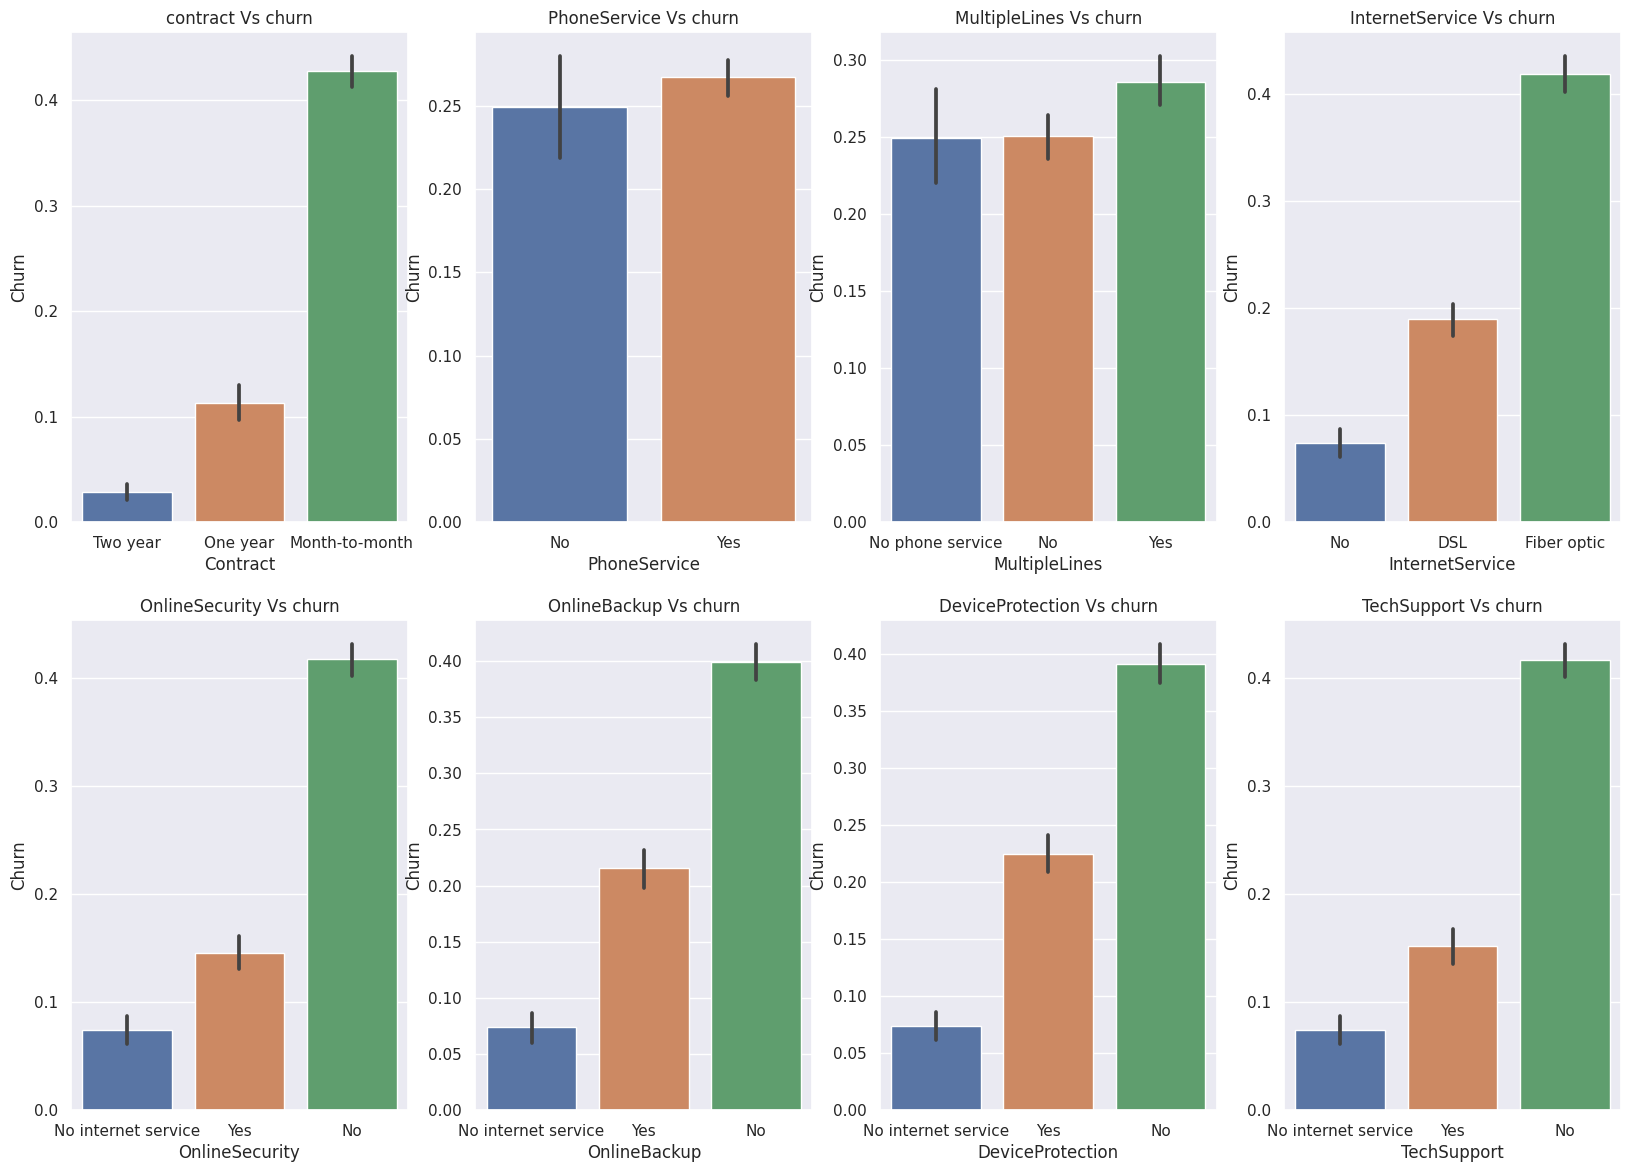

In [ ]:
plt.figure(figsize=(20,14))
plt.subplot(241)
sns.barplot(x=telco_data['Contract'],y=telco_data['Churn'],order=telco_data.groupby('Contract')['Churn'].mean().reset_index().sort_values('Churn')['Contract'])
plt.title("contract Vs churn")


plt.subplot(242)
sns.barplot(x=telco_data['PhoneService'],y=telco_data['Churn'],order=telco_data.groupby('PhoneService')['Churn'].mean().reset_index().sort_values('Churn')['PhoneService'])
plt.title("PhoneService Vs churn")

plt.subplot(243)
sns.barplot(x=telco_data['MultipleLines'],y=telco_data['Churn'],order=telco_data.groupby('MultipleLines')['Churn'].mean().reset_index().sort_values('Churn')['MultipleLines'])
plt.title("MultipleLines Vs churn")

plt.subplot(244)
sns.barplot(x=telco_data['InternetService'],y=telco_data['Churn'],order=telco_data.groupby('InternetService')['Churn'].mean().reset_index().sort_values('Churn')['InternetService'])
plt.title("InternetService Vs churn")

plt.subplot(245)
sns.barplot(x=telco_data['OnlineSecurity'],y=telco_data['Churn'],order=telco_data.groupby('OnlineSecurity')['Churn'].mean().reset_index().sort_values('Churn')['OnlineSecurity'])
plt.title("OnlineSecurity Vs churn")

plt.subplot(246)
sns.barplot(x=telco_data['OnlineBackup'],y=telco_data['Churn'],order=telco_data.groupby('OnlineBackup')['Churn'].mean().reset_index().sort_values('Churn')['OnlineBackup'])
plt.title("OnlineBackup Vs churn")

plt.subplot(247)
sns.barplot(x=telco_data['DeviceProtection'],y=telco_data['Churn'],order=telco_data.groupby('DeviceProtection')['Churn'].mean().reset_index().sort_values('Churn')['DeviceProtection'])
plt.title("DeviceProtection Vs churn")

plt.subplot(248)
sns.barplot(x=telco_data['TechSupport'],y=telco_data['Churn'],order=telco_data.groupby('TechSupport')['Churn'].mean().reset_index().sort_values('Churn')['TechSupport'])
plt.title("TechSupport Vs churn")



*   PhoneService follows linear relationship with churn.
*   MultipleLines follows slight linear relationship.
*   Contrsct not follow linear relationship, distribution of month contract   
    rapidly rise from other.
*   InternetService has no linear distribution. so we do one encoding when  
    fibre optic customers increase churning rate also increase.



Text(0.5, 1.0, 'PaymentMethod Vs churn')

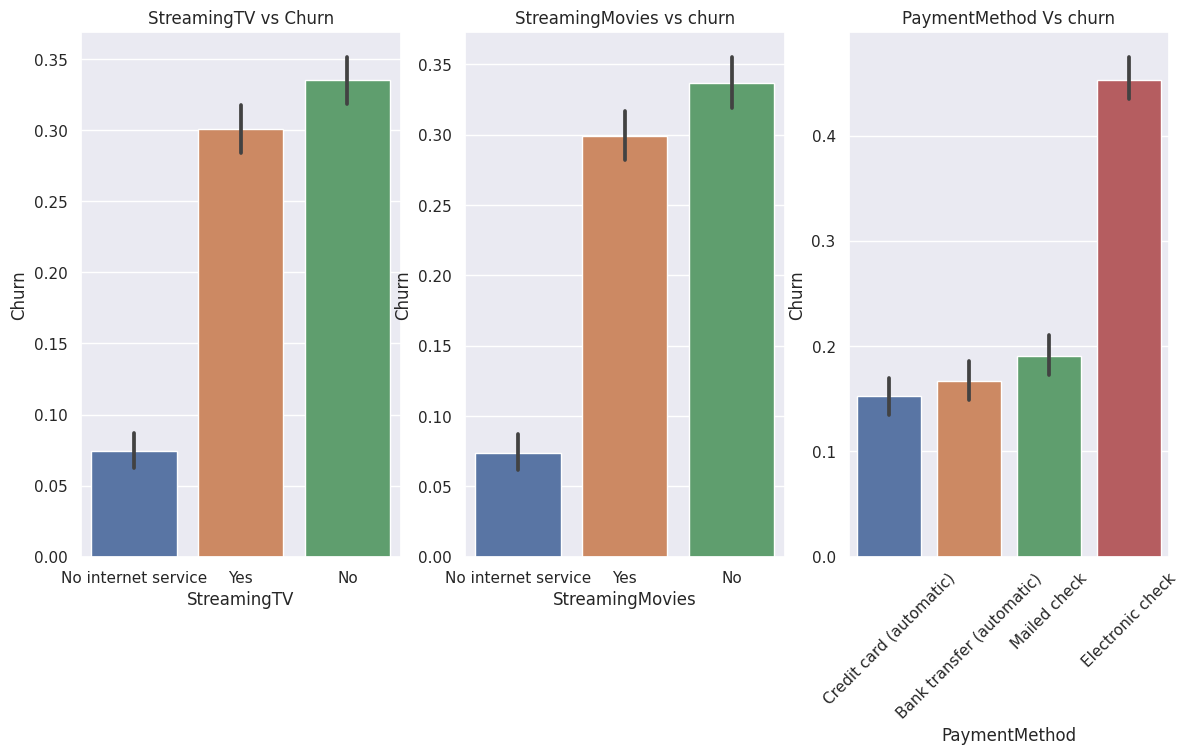

In [ ]:
plt.figure(figsize=(19,15))
plt.subplot(241)
sns.barplot(x=telco_data['StreamingTV'],y=telco_data['Churn'],order=telco_data.groupby('StreamingTV')['Churn'].mean().reset_index().sort_values('Churn')['StreamingTV'])
plt.title("StreamingTV vs Churn")

plt.subplot(242)
sns.barplot(x=telco_data['StreamingMovies'],y=telco_data['Churn'],order=telco_data.groupby('StreamingMovies')['Churn'].mean().reset_index().sort_values('Churn')['StreamingMovies'])
plt.title("StreamingMovies vs churn")

plt.subplot(243)
sns.barplot(x=telco_data['PaymentMethod'],y=telco_data['Churn'],order=telco_data.groupby('PaymentMethod')['Churn'].mean().reset_index().sort_values('Churn')['PaymentMethod'])
plt.xticks(rotation=45)
plt.title("PaymentMethod Vs churn")




*   customers having no internet facility has low churning rate.
*   customers having Electric check as their payment method has more ratio to
    churning to other.
*   customers who don't stream movies are highly churners.



#Label encoding

In [ ]:
telco_data.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [ ]:
telco_data['gender']=telco_data['gender'].map({'Female':1,'Map':0})
telco_data['Partner']=telco_data['Partner'].map({'Yes':1,'No':0})
telco_data['Dependents']=telco_data['Dependents'].map({'Yes':1,'No':0})
telco_data['PhoneService']=telco_data['PhoneService'].map({'Yes':1,'No':0})
telco_data['PaperlessBilling']=telco_data['PaperlessBilling'].map({'Yes':1,'No':0})
telco_data['MultipleLines']=telco_data['MultipleLines'].map({'No phone service':0,'No':1,'Yes':2})


In [ ]:
telco_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_period
0,1.0,0,1,0,1,0,0,DSL,No,Yes,...,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1 - 12
1,NaN,0,0,0,34,1,1,DSL,Yes,No,...,No,No,No,One year,0,Mailed check,56.95,1889.50,0,25 - 36
2,NaN,0,0,0,2,1,1,DSL,Yes,Yes,...,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1 - 12
3,NaN,0,0,0,45,0,0,DSL,Yes,No,...,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,1.0,0,0,0,2,1,1,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,NaN,0,1,1,24,1,2,DSL,Yes,No,...,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0,13 - 24
7039,1.0,0,1,1,72,1,2,Fiber optic,No,Yes,...,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0,61 - 72
7040,1.0,0,1,1,11,0,0,DSL,Yes,No,...,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0,1 - 12
7041,NaN,1,1,0,4,1,2,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1,1 - 12


#one hot encoding

In [ ]:
telco_data['Tenure_period']=pd.to_numeric(telco_data['Tenure_period'],errors='coerce')


In [ ]:
telco_data_new=pd.get_dummies(telco_data)
telco_data_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0,1,0,1,0,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,NaN,0,0,0,34,1,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,NaN,0,0,0,2,1,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,NaN,0,0,0,45,0,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,1.0,0,0,0,2,1,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,NaN,0,1,1,24,1,2,1,84.80,1990.50,...,0,0,1,0,1,0,0,0,0,1
7039,1.0,0,1,1,72,1,2,1,103.20,7362.90,...,0,0,1,0,1,0,0,1,0,0
7040,1.0,0,1,1,11,0,0,1,29.60,346.45,...,1,0,0,1,0,0,0,0,1,0
7041,NaN,1,1,0,4,1,2,1,74.40,306.60,...,1,0,0,1,0,0,0,0,0,1


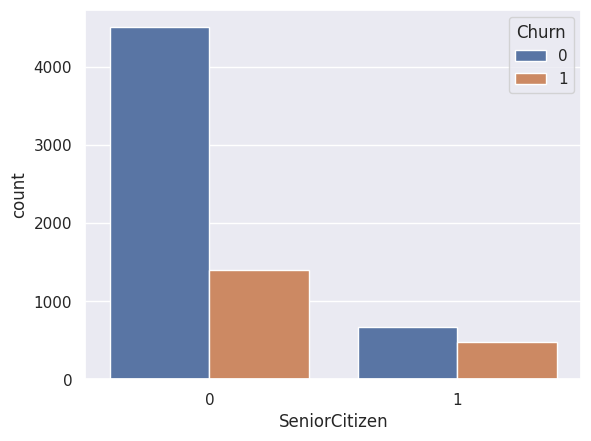

In [ ]:
ax = sns.countplot(x='SeniorCitizen',data=telco_data_new, hue='Churn')

Non senior citizens are more likely churn.

<Axes: >

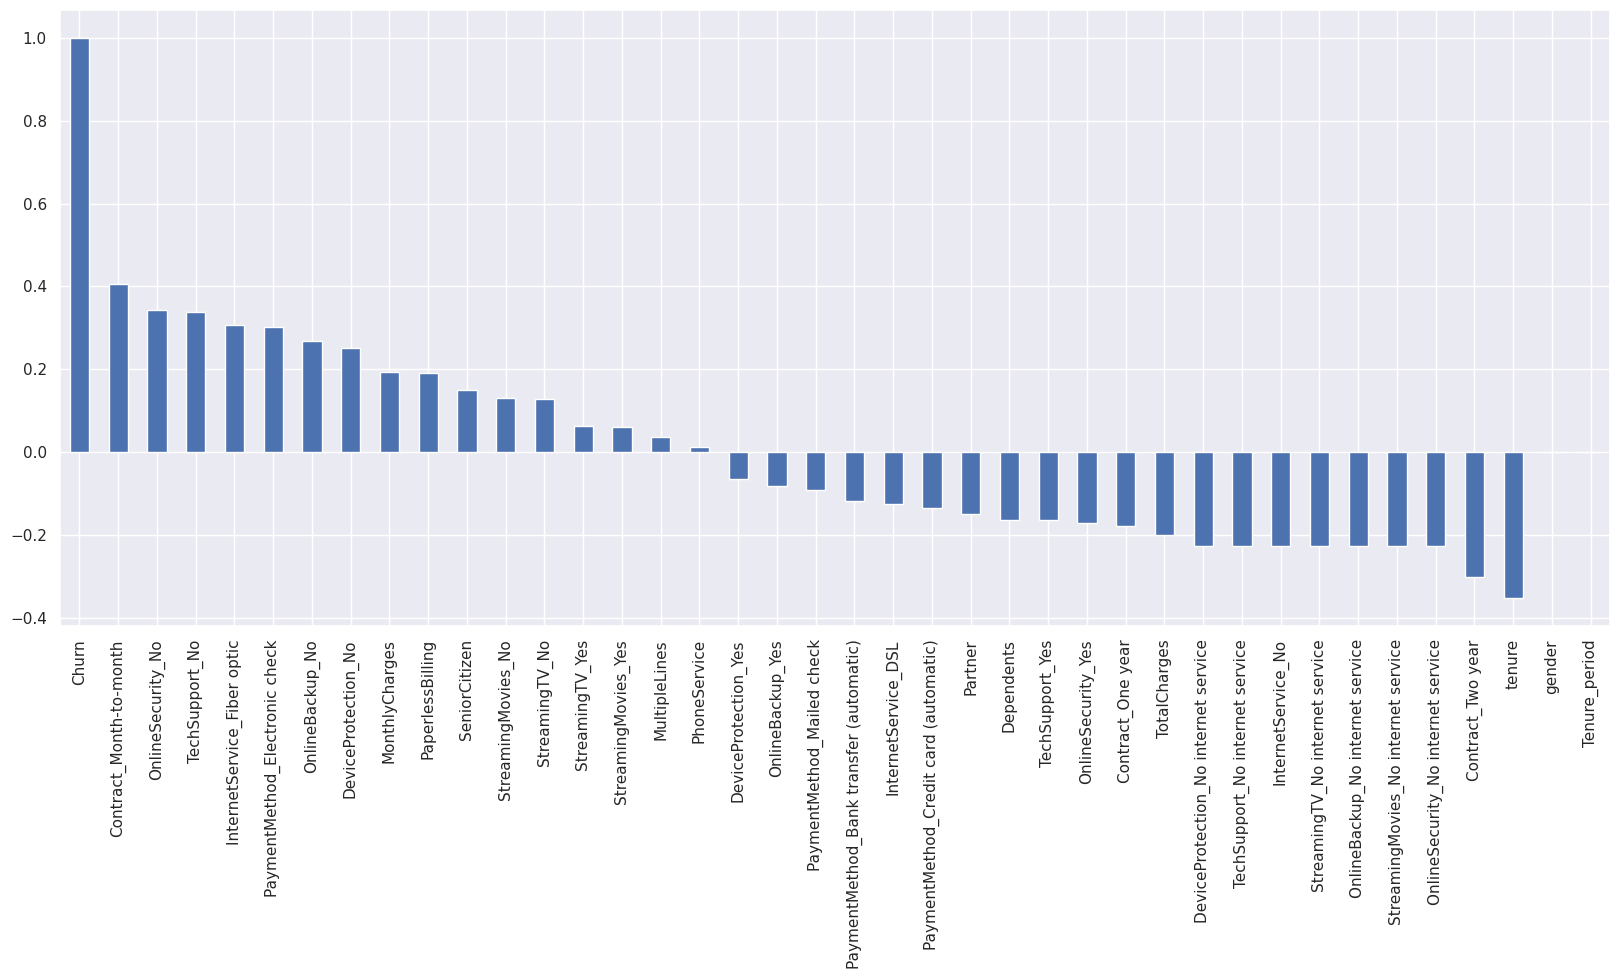

In [ ]:
plt.figure(figsize=(20,8))
telco_data_new.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')



*   Gender, phoneservice and multiple lines have no impact on churn factor.
*   contract for 2 years has very low co-relation to churn.
*   customer with **no internet service** seems like to be have very low churn.
*   High churn factors are **month contract, electronic payment, no tech
    support, no online security.**
*   Monthly contract customers are more likely to churn due to low time  
    contract terms.



In [ ]:
#telco_data_new.to_csv('Telecom_customer_churn.csv')


#ML Model



*   We know that our data highly imbalanced dataset.Majority(70%) of the data belongs to one class.Churning customers are --No(73%) & yes(23%)

*   So we have to do imbalanced learning to avaoid skew.



In [ ]:
!pip install imblearn

In [ ]:
x = telco_data_new.drop(["Churn","tenure"],axis='columns')
y = telco_data_new['Churn']

In [ ]:
import imblearn
from imblearn.combine import SMOTETomek

In [ ]:
print(x.isna().sum())


gender                                     3555
SeniorCitizen                                 0
Partner                                       0
Dependents                                    0
PhoneService                                  0
MultipleLines                                 0
PaperlessBilling                              0
MonthlyCharges                                0
TotalCharges                                  0
Tenure_period                              7043
InternetService_DSL                           0
InternetService_Fiber optic                   0
InternetService_No                            0
OnlineSecurity_No                             0
OnlineSecurity_No internet service            0
OnlineSecurity_Yes                            0
OnlineBackup_No                               0
OnlineBackup_No internet service              0
OnlineBackup_Yes                              0
DeviceProtection_No                           0
DeviceProtection_No internet service    

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)


In [ ]:
smote = SMOTETomek(sampling_strategy='all')
x_sm, y_sm = smote.fit_resample(x_imputed, y)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.25,random_state=0) #splitting


In [ ]:
x_train.shape,x_test.shape

((7104, 37), (2368, 37))

In [ ]:
from sklearn.preprocessing import StandardScaler #scaling
scaler =StandardScaler()
scaler.fit(x_train,y_train)
X_train=scaler.transform(x_train)
X_test=scaler.transform(x_test)

In [ ]:
X_train.shape,X_test.shape

((7104, 37), (2368, 37))

LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train) #fit model

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
lr.predict_proba(X_test)

array([[0.39198556, 0.60801444],
       [0.17685135, 0.82314865],
       [0.91720518, 0.08279482],
       ...,
       [0.5769753 , 0.4230247 ],
       [0.11866241, 0.88133759],
       [0.7524619 , 0.2475381 ]])

In [ ]:
from sklearn.metrics import roc_auc_score,plot_roc_curve,roc_curve,confusion_matrix


ImportError: ignored

In [ ]:
#confusion_matrix(y_test,y_pred)
plot_roc_curve(lr,X_test,y_test)

NameError: ignored

In [ ]:
acc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
print("Test set auc: {:.2f}".format(acc))


Test set auc: 0.86


AUCROC score is 0.94 Good model.

<Axes: xlabel='Predicted', ylabel='Actual'>

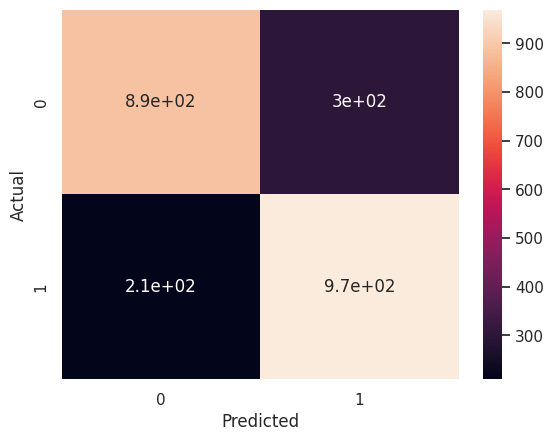

In [ ]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)

KNN-K Nearest Neighbours

In [ ]:
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn=KNeighborsClassifier(i)
  knn.fit(X_train,y_train)
  print("K value  : ", i, " Train Accuracy : ", knn.score(X_train,y_train)," score :  ", np.mean(cross_val_score(knn,X_train,y_train,cv=10)))


K value  :  1  Train Accuracy :  0.9977477477477478  score :   0.8229149581030486
K value  :  2  Train Accuracy :  0.9383445945945946  score :   0.7922255898258751
K value  :  3  Train Accuracy :  0.9011824324324325  score :   0.7967322358907312
K value  :  4  Train Accuracy :  0.8875281531531531  score :   0.7926481250371428
K value  :  5  Train Accuracy :  0.8595157657657657  score :   0.7964529228818764
K value  :  6  Train Accuracy :  0.8561373873873874  score :   0.7999675125294666
K value  :  7  Train Accuracy :  0.8410754504504504  score :   0.7932101186585052
K value  :  8  Train Accuracy :  0.8413569819819819  score :   0.8010928864325193
K value  :  9  Train Accuracy :  0.8309403153153153  score :   0.7920865276044452
K value  :  10  Train Accuracy :  0.8340371621621622  score :   0.7985598542025713
K value  :  20  Train Accuracy :  0.8112331081081081  score :   0.7911004140171549
K value  :  50  Train Accuracy :  0.7836430180180181  score :   0.7778673164160773


 k=10 has the highest cross validation score. Training accuracy doesn't make any sense.

In [ ]:
knn= KNeighborsClassifier(10)
knn.fit(X_train,y_train)
#plot_roc_curve(knn,X_test,y_test)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
#prediction
knn_pred = knn.predict(X_test)
knn_pred

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
#eveluation
#plot_roc_curve(knn,X_test,y_test)

In [ ]:
acc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
print("Test set auc: {:.2f}".format(acc))


Test set auc: 0.88


AUROC score is 0.88 Good Model.

Decision tree

In [ ]:
dtt = DecisionTreeClassifier()
dtt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split


DecisionTreeClassifier()

In [ ]:
dtt_pred = dtt.predict(X_test)
dtt_pred

array([1, 0, 0, ..., 0, 1, 0])

But for decision tree we have to set DEPTH parameter to reduce overfitting if we don't it will grow without limit that leads to overfit.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

In [ ]:
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train,y_train)
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train))
  dt = DecisionTreeClassifier(max_depth=depth)
  valAccuracy = cross_val_score(dt,X_train,y_train,cv=10)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.7687218468468469  Cross val score :  0.7685768903151681
Depth  :  2  Training Accuracy :  0.8043355855855856  Cross val score :  0.8041892989441571
Depth  :  3  Training Accuracy :  0.8150337837837838  Cross val score :  0.8061609318357401
Depth  :  4  Training Accuracy :  0.8229166666666666  Cross val score :  0.8119314197420813
Depth  :  5  Training Accuracy :  0.8341779279279279  Cross val score :  0.8315013569461776
Depth  :  6  Training Accuracy :  0.8512105855855856  Cross val score :  0.837410312790951
Depth  :  7  Training Accuracy :  0.8638795045045045  Cross val score :  0.841071888433272
Depth  :  8  Training Accuracy :  0.8709177927927928  Cross val score :  0.8402276103880668
Depth  :  9  Training Accuracy :  0.8852759009009009  Cross val score :  0.8389643628295795
Depth  :  10  Training Accuracy :  0.9018862612612613  Cross val score :  0.8443137021849804
Depth  :  20  Training Accuracy :  0.9940878378378378  Cross val score :  0.81869

Depth parameter is 9.

In [ ]:
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
dt_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
dt_acc = roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])
print("Test set auc decision tree: {:.2f}".format(dt_acc))

Test set auc decision tree: 0.82


0.82 is a good model

AttributeError: ignored

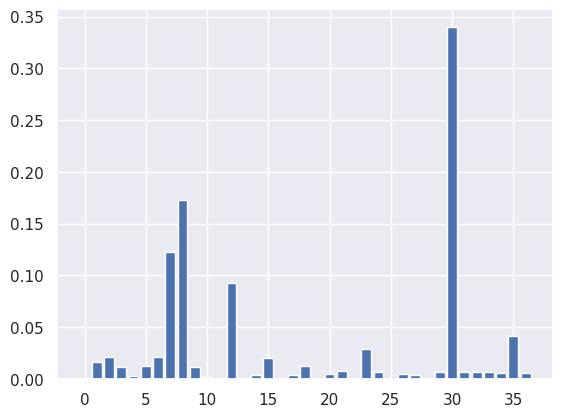

In [ ]:
from matplotlib import pyplot
importance=dt.feature_importances_
pyplot.bar([x for x in range(len(importance))],importance)
list(zip(importance,x_test.columns))


Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=3,max_features='sqrt')
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [ ]:
rf_predict=rf.predict(X_test)
rf_predict

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
rf_acc=roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
print("Test set auc random forest: {:.2f}".format(rf_acc))

Test set auc random forest: 0.91


0.91 is good auroc score.

XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate=lr,n_estimators=100,verbosity=0)
  model.fit(X_train,y_train)

  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))


Learning rate :  0.01  Train score :  0.8676801801801802  Cross-Val score :  0.8534593213288166
Learning rate :  0.02  Train score :  0.8800675675675675  Cross-Val score :  0.8623276084071234
Learning rate :  0.03  Train score :  0.8865427927927928  Cross-Val score :  0.8641581981339514
Learning rate :  0.04  Train score :  0.8903434684684685  Cross-Val score :  0.8682419127988747
Learning rate :  0.05  Train score :  0.8961148648648649  Cross-Val score :  0.8699300727006201
Learning rate :  0.06  Train score :  0.9021677927927928  Cross-Val score :  0.8695063489233572
Learning rate :  0.07  Train score :  0.9079391891891891  Cross-Val score :  0.8710578237356629
Learning rate :  0.08  Train score :  0.911036036036036  Cross-Val score :  0.8728860363305007
Learning rate :  0.09  Train score :  0.9135698198198198  Cross-Val score :  0.8695075374893524
Learning rate :  0.1  Train score :  0.9158220720720721  Cross-Val score :  0.8717588795784552
Learning rate :  0.11  Train score :  0.91

learning rate =0.2 has the highest cross-val-score.

In [ ]:
xg_pred=model.predict(X_test)
xg_pred

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
xgb_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("Test set auc xgb: {:.2f}".format(xgb_auc))

Test set auc xgb: 0.94


AUROC of XGB is 0.93

#comparing models


1.   AUROC of XGB is 0.93.
2.   AUROC of Random forest is 0.88
3.   AUROC of KNN is 0.93
4.   AUROC of Decision tree is 0.83
5.   AUROC of Logistic regression is 0.94

Logistic regression model has the highest AUROC score.



https://github.com/Abinaya2598/Customer_telcom_churn_prediction